In [17]:
!pip install pandas scikit-learn matplotlib seaborn


In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [75]:
# creating data set with only two features...

data = {
    'size (sqft)': [1000, 1400, 1800, 2200, 2600, 3000],
    'price ($)':       [200000, 280000, 360000, 440000, 520000, 600000]
}


df = pd.DataFrame(data)
df

,size (sqft),price ($)
0,1000,200000
1,1400,280000
2,1800,360000
3,2200,440000
4,2600,520000
5,3000,600000


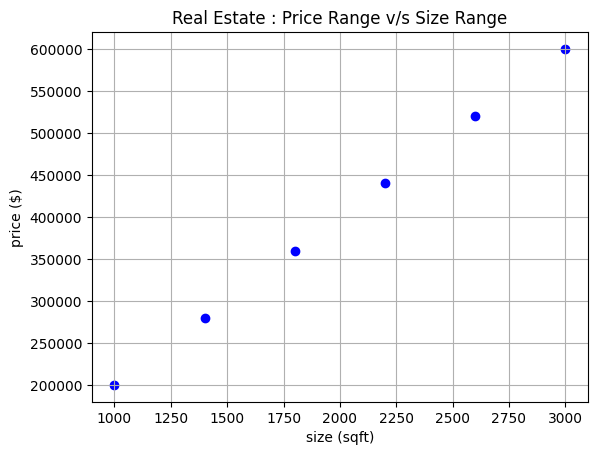

In [76]:
# graph potting ...
plt.scatter(df['size (sqft)'],df['price ($)'],color = 'blue')
plt.xlabel('size (sqft)')
plt.ylabel('price ($)')
plt.title('Real Estate : Price Range v/s Size Range')
plt.grid(True) # used to enable grid
plt.show()

In [77]:
# preping data for model...

# suppose y = f(X) , X is uppercase, y is lowercase

X = df[['size (sqft)']] # independent should be 2D
y = df['price ($)']

X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)
 
 # here parameters : test_size says it uses only 20% of the data for testing , 42 as random_state gives accuracy. 


In [78]:
# training the model...

model = LinearRegression()
model.fit(X_train,y_train) 



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [79]:
# prediction ...

y_pred = model.predict(X_test)

# comparision ...

result = pd.DataFrame({'size (sqft)' : X_test.squeeze(),'Actual' : y_test , 'Predicted' : y_pred})
result

,size (sqft),Actual,Predicted
0,1000,200000,200000.0
1,1400,280000,280000.0


In [80]:
# Evaluation / resolving point error here ...

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error : {mse:.2f}') # used to check close ness of values.




Mean Squared Error : 0.00


In [81]:
import pandas as pd # to remove warning passing a new dataframe...

new_size = pd.DataFrame({'size (sqft)' : [1000]})

predicted_price = model.predict(new_size)

print(f'The predicted price of the property is :  ${predicted_price[0]:.2f}')


The predicted price of the property is :  $200000.00


c:\Users\Admin\OneDrive\Documents\Repositories\Machine-Learning\sci-env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


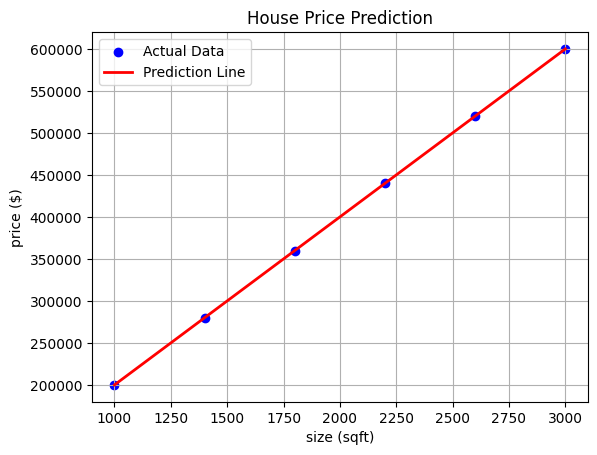

In [82]:
# final graph...

import matplotlib.pyplot as plt
import numpy as np

# range line ...

sizes = np.linspace(df['size (sqft)'].min(), df['size (sqft)'].max(), 100).reshape(-1, 1)

predicted_prices = model.predict(sizes)

# plotting the actual label

plt.scatter(df['size (sqft)'], df['price ($)'], color='blue', label='Actual Data')

#plotting the predicted label

plt.plot(sizes, predicted_prices, color='red', linewidth=2, label='Prediction Line')

# Labels and title
plt.xlabel('size (sqft)')
plt.ylabel('price ($)')
plt.title('House Price Prediction')
plt.legend()
plt.grid(True)

# Show plot
plt.show()